# Data Understanding

In [164]:
import os
import pandas as pd
import numpy as np

In [165]:
csv_file = 'ObesityDataSet_raw_and_data_sinthetic.csv'
try:
    df = pd.read_csv(csv_file)
    print(f"Dataset '{csv_file}' berhasil dimuat.")
except FileNotFoundError:
    print(f"File {csv_file} tidak ditemukan.")
    raise

print("\nUkuran data:", df.shape)

Dataset 'ObesityDataSet_raw_and_data_sinthetic.csv' berhasil dimuat.

Ukuran data: (2111, 17)


In [166]:
print("\nSepuluh baris pertama:")
df.head(10)


Sepuluh baris pertama:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [167]:
print("Informasi struktur dataset:")
df.info()

Informasi struktur dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

In [168]:
print("\nNilai unik pada beberapa kolom kategorikal:")
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']:
    print(f"{col} -> {df[col].unique()}")


Nilai unik pada beberapa kolom kategorikal:
Gender -> ['Female' 'Male']
family_history_with_overweight -> ['yes' 'no']
FAVC -> ['no' 'yes']
CAEC -> ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE -> ['no' 'yes']
SCC -> ['no' 'yes']
CALC -> ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS -> ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad -> ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [169]:
# Cek missing values
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [170]:
# Cek duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 24


In [171]:
# Deteksi outlier dengan IQR untuk kolom numerik
num_cols = df.select_dtypes(include=np.number).columns
outlier_info = {}
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    batas_bawah, batas_atas = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)].shape[0]
    outlier_info[col] = outliers

print("\nJumlah outlier per kolom numerik:")
print(outlier_info)



Jumlah outlier per kolom numerik:
{'Age': 168, 'Height': 1, 'Weight': 1, 'FCVC': 0, 'NCP': 579, 'CH2O': 0, 'FAF': 0, 'TUE': 0}


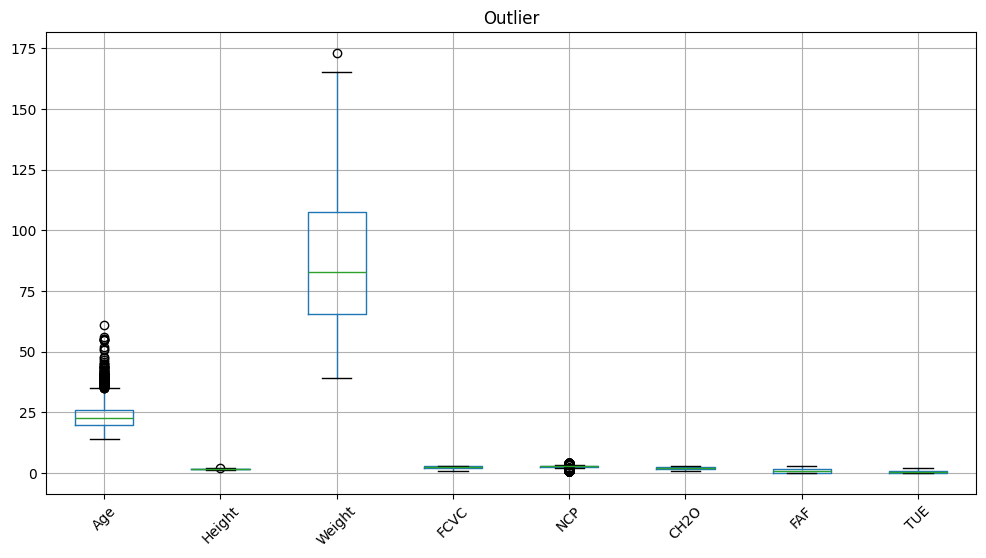

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.title('Outlier')
plt.xticks(rotation=45)
plt.show()

In [173]:
# Statistik deskriptif untuk variabel numerik
desc = df.describe().T
desc[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
Age,24.312600,22.777890,6.345968,14.00,61.00
Height,1.701677,1.700499,0.093305,1.45,1.98
Weight,86.586058,83.000000,26.191172,39.00,173.00
FCVC,2.419043,2.385502,0.533927,1.00,3.00
NCP,2.685628,3.000000,0.778039,1.00,4.00
CH2O,2.008011,2.000000,0.612953,1.00,3.00
FAF,1.010298,1.000000,0.850592,0.00,3.00
TUE,0.657866,0.625350,0.608927,0.00,2.00


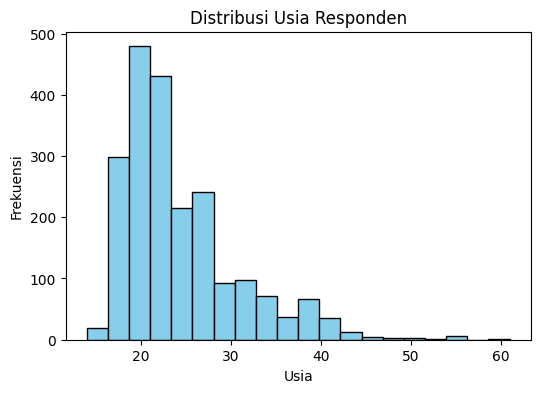

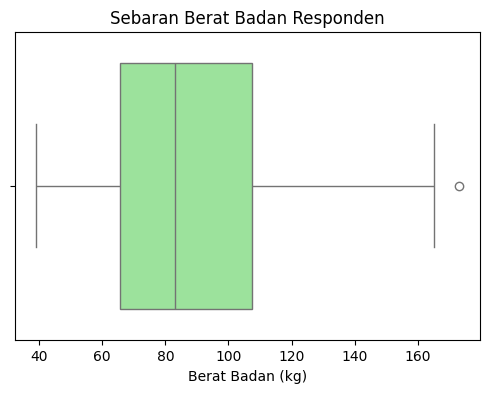

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Responden')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Weight'], color='lightgreen')
plt.title('Sebaran Berat Badan Responden')
plt.xlabel('Berat Badan (kg)')
plt.show()



Distribusi frekuensi untuk Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


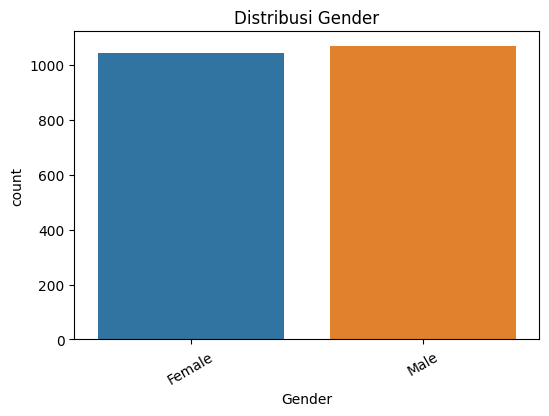


Distribusi frekuensi untuk family_history_with_overweight:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


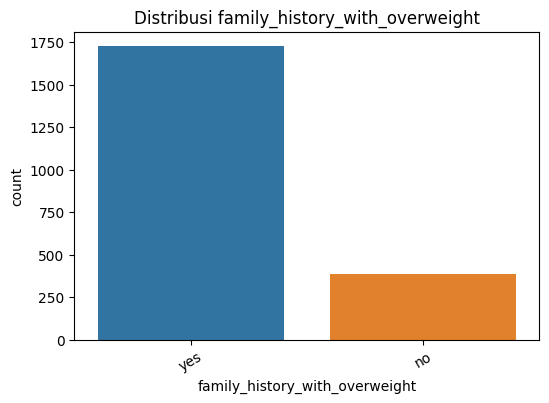


Distribusi frekuensi untuk FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


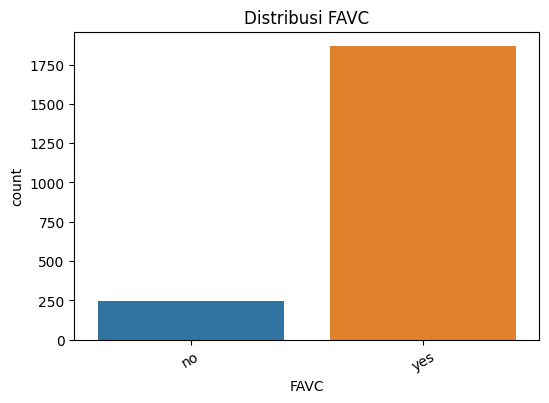


Distribusi frekuensi untuk CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


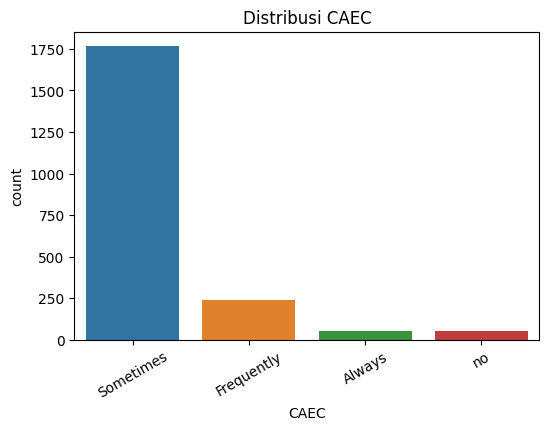


Distribusi frekuensi untuk NObeyesdad:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


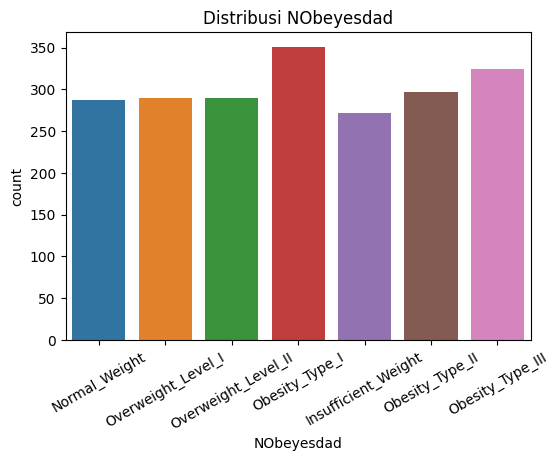

In [175]:
# Frekuensi variabel kategorikal utama
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'NObeyesdad']
for col in cat_cols:
    print(f"\nDistribusi frekuensi untuk {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='tab10')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
    plt.show()

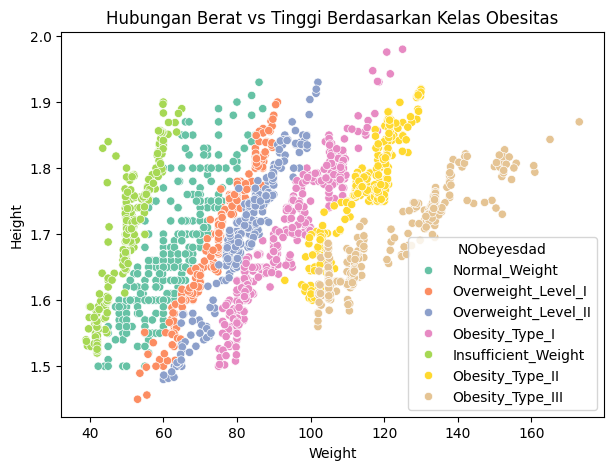

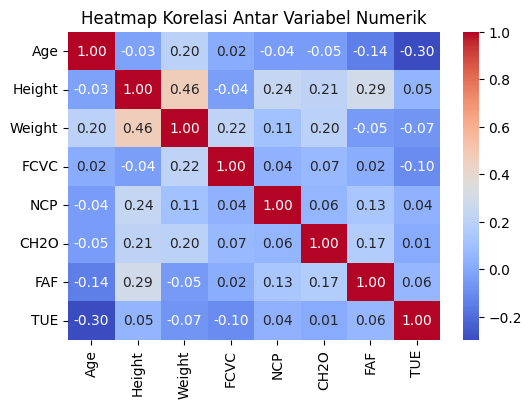

In [176]:
# Scatter plot hubungan berat badan vs tinggi badan
plt.figure(figsize=(7,5))
sns.scatterplot(x='Weight', y='Height', hue='NObeyesdad', data=df, palette='Set2')
plt.title('Hubungan Berat vs Tinggi Berdasarkan Kelas Obesitas')
plt.show()

# Korelasi numerik
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

/tmp/ipython-input-2541553718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette='husl')


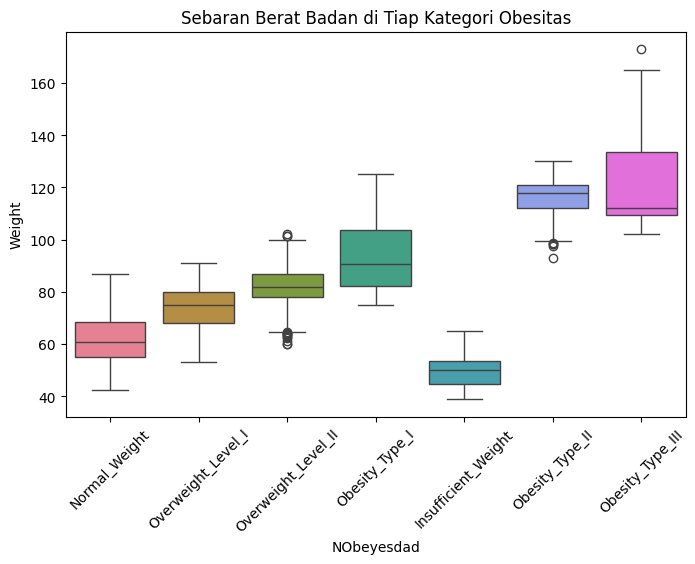

/tmp/ipython-input-2541553718.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_history_with_overweight', y='FAF', data=df, palette='pastel', ci=None)
/tmp/ipython-input-2541553718.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_history_with_overweight', y='FAF', data=df, palette='pastel', ci=None)


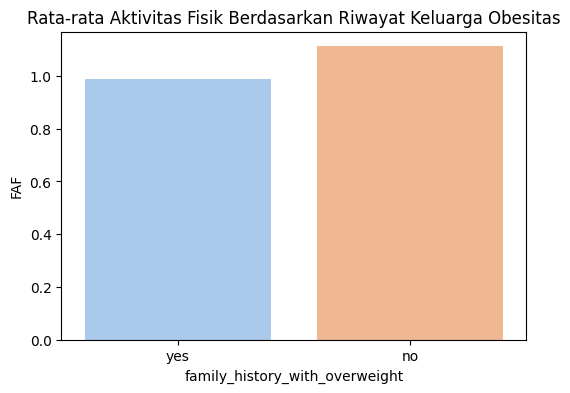

In [177]:
# Boxplot perbandingan berat badan di tiap kategori obesitas
plt.figure(figsize=(8,5))
sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette='husl')
plt.title('Sebaran Berat Badan di Tiap Kategori Obesitas')
plt.xticks(rotation=45)
plt.show()

# Rata-rata aktivitas fisik berdasarkan riwayat keluarga obesitas
plt.figure(figsize=(6,4))
sns.barplot(x='family_history_with_overweight', y='FAF', data=df, palette='pastel', ci=None)
plt.title('Rata-rata Aktivitas Fisik Berdasarkan Riwayat Keluarga Obesitas')
plt.show()

Proporsi konsumsi makanan tinggi kalori berdasarkan riwayat keluarga obesitas:
FAVC                                   no        yes
family_history_with_overweight                      
no                              25.714286  74.285714
yes                              8.458864  91.541136


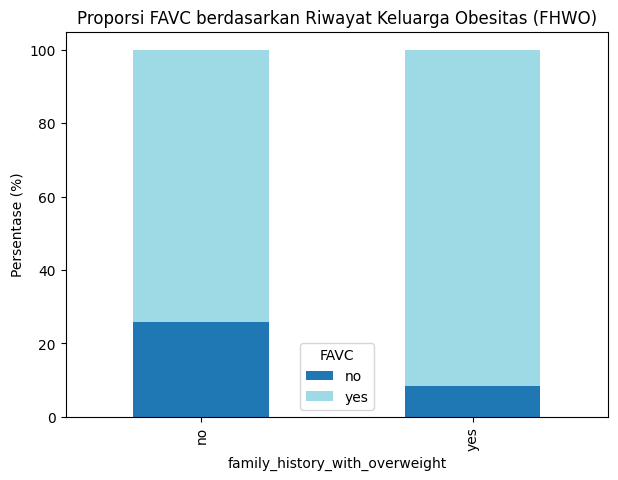

In [178]:
# Crosstab antara FHWO dan FAVC
cross_tab = pd.crosstab(df['family_history_with_overweight'], df['FAVC'], normalize='index') * 100
print("Proporsi konsumsi makanan tinggi kalori berdasarkan riwayat keluarga obesitas:")
print(cross_tab)

# Visualisasi stacked bar
cross_tab.plot(kind='bar', stacked=True, colormap='tab20', figsize=(7,5))
plt.title('Proporsi FAVC berdasarkan Riwayat Keluarga Obesitas (FHWO)')
plt.ylabel('Persentase (%)')
plt.show()

# Data Preparation

Hapus duplikat

In [179]:
# Menghapus data duplikat
df_clean = df.drop_duplicates()
print(f"Jumlah data setelah duplikat dihapus: {df_clean.shape}")

Jumlah data setelah duplikat dihapus: (2087, 17)


cek data outliar

In [180]:
Q1, Q3 = df['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df[(df['Age'] < lower) | (df['Age'] > upper)][['Age']]
Q1, Q3 = df['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df[(df['Age'] < lower) | (df['Age'] > upper)][['Age']]

,Age
13,41.000000
21,52.000000
33,39.000000
92,55.000000
104,38.000000
...,...
1740,37.765356
1775,37.207082
1776,38.108940
1777,38.644441


In [181]:
Q1, Q3 = df['NCP'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df[(df['NCP'] < lower) | (df['NCP'] > upper)][['NCP']]
Q1, Q3 = df['NCP'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df[(df['NCP'] < lower) | (df['NCP'] > upper)][['NCP']]

,NCP
4,1.000000
14,1.000000
16,1.000000
17,1.000000
18,4.000000
...,...
1794,2.142328
1795,1.437959
1796,1.343117
1797,1.213431


In [182]:
# Periksa nilai NCP yang desimal
df[df['NCP'] % 1 != 0][['NCP']].head(20)

,NCP
507,3.289260
509,3.995147
513,1.726260
514,2.581015
515,1.600812
516,1.737620
517,1.105480
520,2.084600
521,1.894384
524,2.857787


penanganan outliar untuk NCP

In [183]:
# Pembulatan
df['NCP'] = df['NCP'].round().astype(int)

# Hapus baris yang nilai NCPnya tidak bulat
df = df[df['NCP'] % 1 == 0]

In [184]:
Q1, Q3 = df['Weight'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df[(df['Weight'] < lower) | (df['Weight'] > upper)][['Weight']]
Q1, Q3 = df['Weight'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df[(df['Weight'] < lower) | (df['Weight'] > upper)][['Weight']]

,Weight
344,173.0


Konversi fitur kategorikal

In [185]:
from sklearn.preprocessing import LabelEncoder

mapping_dict = {'yes': 1, 'no': 0, 'Male': 1, 'Female': 0}

# Terapkan ke semua kolom biner
cols_binary = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in cols_binary:
    df_clean[col] = df_clean[col].map(mapping_dict)

# Label Encoding untuk kolom multi-kategori
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_multi = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
for col in cols_multi:
    df_clean[col] = le.fit_transform(df_clean[col])

In [186]:
print("Tampilan awal dataframe setelah transformasi variabel kategorikal:")
display(df_clean.head())

Tampilan awal dataframe setelah transformasi variabel kategorikal:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [187]:
encoded = df_clean.copy()

# Rekayasa fitur: BMI
encoded['BMI'] = encoded['Weight'] / (encoded['Height'] ** 2)

display(encoded.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


In [188]:
factors = ['Weight', 'BMI', 'FAF', 'family_history_with_overweight']
corr_factors = encoded[factors + ['NObeyesdad']].corr()
print("Korelasi faktor dominan terhadap tingkat obesitas:")
print(corr_factors['NObeyesdad'].sort_values(ascending=False))

Korelasi faktor dominan terhadap tingkat obesitas:
NObeyesdad                        1.000000
BMI                               0.429668
Weight                            0.388802
family_history_with_overweight    0.330391
FAF                              -0.135192
Name: NObeyesdad, dtype: float64


In [189]:
from sklearn.preprocessing import MinMaxScaler

encoded = encoded.reset_index(drop=True)

In [190]:
# Pilih kolom yang benar-benar numerik
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

scaler = MinMaxScaler()
encoded[numeric_columns] = scaler.fit_transform(encoded[numeric_columns])

print("Data berhasil dinormalisasi (Min-Max Scaling).")
display(encoded.head())

Data berhasil dinormalisasi (Min-Max Scaling).


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,2,0,0.5,0,0.000000,0.5,3,3,1,0.301162
1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,2,1,1.0,1,1.000000,0.0,2,3,1,0.297240
2,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,2,0,0.5,0,0.666667,0.5,1,3,1,0.284736
3,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,2,0,0.5,0,0.666667,0.0,1,4,5,0.366359
4,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,2,0,0.5,0,0.000000,0.0,2,3,6,0.405778


In [191]:
from sklearn.model_selection import train_test_split

X = encoded.drop(['NObeyesdad', 'BMI', 'Weight', 'Height'], axis=1)
y = encoded['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensi X_train: {X_train.shape}")
print(f"Dimensi X_test: {X_test.shape}")

Dimensi X_train: (1669, 14)
Dimensi X_test: (418, 14)


# Modeling

In [192]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Perbandingan model

hasil_dt = {}

for md_rf in [14, 16, 18, None]:
    model = RandomForestClassifier(max_depth=md_rf, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    hasil_dt[md_rf] = accuracy_score(y_test, pred)

hasil_dt

{14: 0.84688995215311,
 16: 0.854066985645933,
 18: 0.8492822966507177,
 None: 0.8444976076555024}

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan random_state=42 agar hasil konsisten
rf_model = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=42, min_samples_split=2, min_samples_leaf=4)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Random Forest: {accuracy:.2%}")


Akurasi Model Random Forest: 82.30%


In [194]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        59
           1       0.64      0.64      0.64        61
           2       0.75      0.90      0.82        70
           3       0.91      0.94      0.92        64
           4       1.00      1.00      1.00        60
           5       0.84      0.69      0.76        55
           6       0.73      0.73      0.73        49

    accuracy                           0.82       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.83      0.82      0.82       418



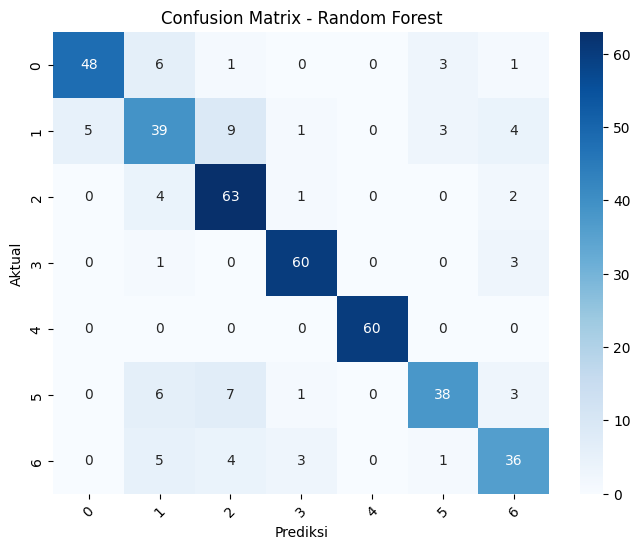

In [195]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1133494599.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=feature_importance, palette='viridis')


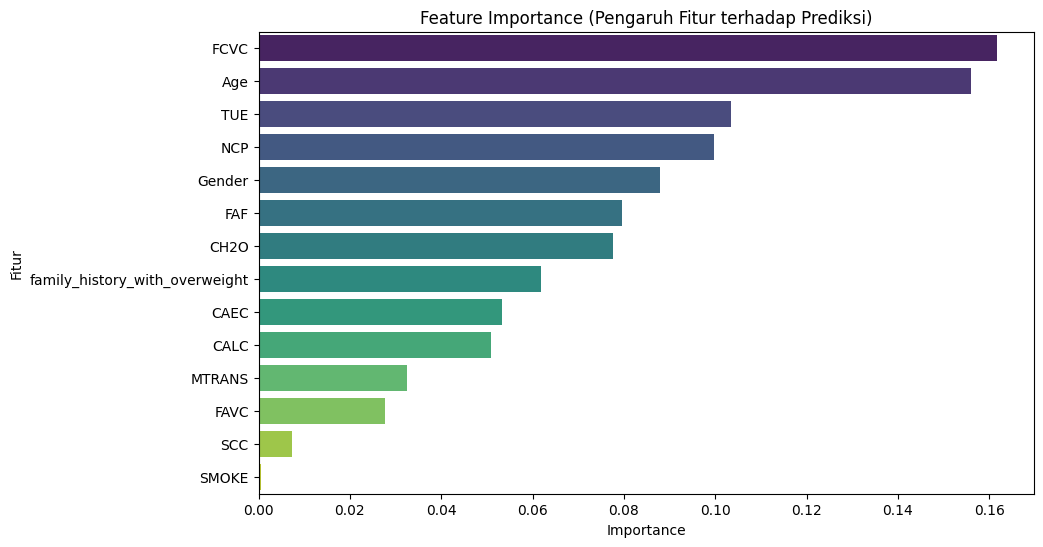

In [196]:
# Memvisualisasikan fitur mana yang paling berpengaruh
feature_importance = pd.DataFrame({
    'Fitur': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Pengaruh Fitur terhadap Prediksi)')
plt.show()

In [197]:
# Cek akurasi pada data Training
y_pred_train = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)

print(f"Akurasi Training: {train_acc:.2%}")
print(f"Akurasi Testing : {accuracy:.2%}")

if train_acc - accuracy > 0.10: # Beda lebih dari 10%
    print("STATUS: INDICATED OVERFITTING")
else:
    print("STATUS: GOOD FIT (Tidak Overfit)")

Akurasi Training: 91.85%
Akurasi Testing : 82.30%
STATUS: GOOD FIT (Tidak Overfit)


Sedang menjalankan Cross-Validation (ini mungkin memakan waktu sedikit)...

Skor Akurasi setiap Fold:
[0.88516746 0.88516746 0.84210526 0.87559809 0.87559809 0.88038278
 0.82296651 0.85576923 0.86057692 0.86538462]

--- HASIL AKHIR ---
Rata-rata Akurasi: 86.49%
Standar Deviasi  : 0.0192


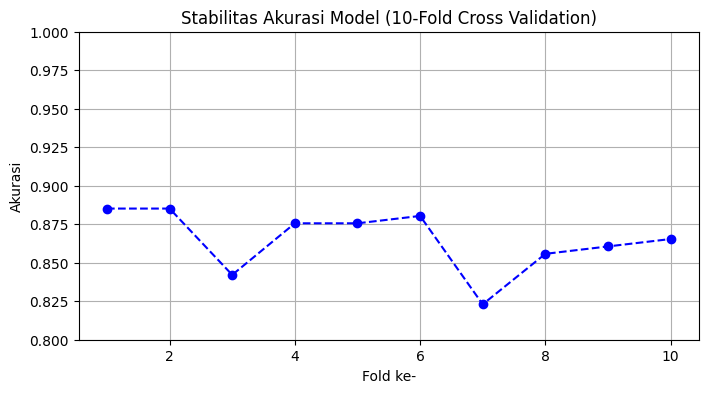

In [198]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

X = encoded.drop(['NObeyesdad', 'BMI', 'Weight', 'Height'], axis=1)
y = encoded['NObeyesdad']

rf_model_cv = RandomForestClassifier(n_estimators=150, random_state=42)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Sedang menjalankan Cross-Validation (ini mungkin memakan waktu sedikit)...")
cv_scores = cross_val_score(rf_model_cv, X, y, cv=kfold, scoring='accuracy')

print(f"\nSkor Akurasi setiap Fold:\n{cv_scores}")
print(f"\n--- HASIL AKHIR ---")
print(f"Rata-rata Akurasi: {cv_scores.mean():.2%}")
print(f"Standar Deviasi  : {cv_scores.std():.4f}")

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--', color='b')
plt.title('Stabilitas Akurasi Model (10-Fold Cross Validation)')
plt.xlabel('Fold ke-')
plt.ylabel('Akurasi')
plt.ylim(0.80, 1.00)
plt.grid(True)
plt.show()

In [199]:
import joblib

# Simpan Model Random Forest
joblib.dump(rf_model, 'model_obesitas_rf.pkl')

# Simpan Scaler wajib disimpan agar input di aplikasi nanti punya skala yang sama
joblib.dump(scaler, 'scaler_obesitas.pkl')

print("BERHASIL: Model dan Scaler telah disimpan dalam format .pkl")
print("1. model_obesitas_rf.pkl")
print("2. scaler_obesitas.pkl")

BERHASIL: Model dan Scaler telah disimpan dalam format .pkl
1. model_obesitas_rf.pkl
2. scaler_obesitas.pkl


# Modeling

In [200]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Perbandingan model

hasil_dt = {}

for md_dt in [12, 14, 16, None]:
    model = DecisionTreeClassifier(max_depth=md_dt, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    hasil_dt[md_dt] = accuracy_score(y_test, pred)

hasil_dt


{12: 0.7416267942583732,
 14: 0.7655502392344498,
 16: 0.7488038277511961,
 None: 0.7488038277511961}

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeling Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=14, min_samples_split=2, min_samples_leaf=3)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))

Akurasi Decision Tree: 0.7559808612440191

Classification Report Decision Tree:

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        59
           1       0.60      0.67      0.64        61
           2       0.70      0.81      0.75        70
           3       0.85      0.91      0.88        64
           4       1.00      0.98      0.99        60
           5       0.76      0.56      0.65        55
           6       0.65      0.53      0.58        49

    accuracy                           0.76       418
   macro avg       0.76      0.75      0.75       418
weighted avg       0.76      0.76      0.75       418



In [202]:
# Cek akurasi pada data Training
y_pred_train_dt = dt_model.predict(X_train)
train_acc_dt = accuracy_score(y_train, y_pred_train_dt)

print(f"Akurasi Training: {train_acc:.2%}")
print(f"Akurasi Testing : {accuracy:.2%}")

if train_acc_dt - accuracy > 0.10: # Beda lebih dari 10%
    print("STATUS: INDICATED OVERFITTING")
else:
    print("STATUS: GOOD FIT (Tidak Overfit)")

Akurasi Training: 91.85%
Akurasi Testing : 82.30%
STATUS: GOOD FIT (Tidak Overfit)


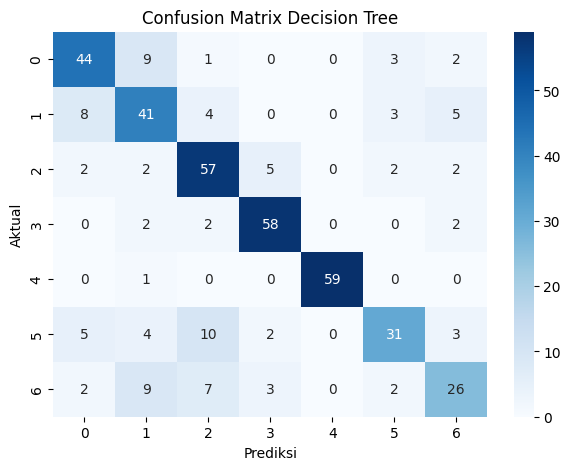

In [203]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(7,5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_,
            yticklabels=dt_model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Decision Tree")
plt.show()

In [204]:
from sklearn.ensemble import RandomForestClassifier

# Modeling Random Forest Classifier

rf_model = RandomForestClassifier(
    n_estimators = 150,
    max_features = "sqrt",
    bootstrap = True,
    oob_score = True,
    random_state = 42,
    criterion = "gini"
)

rf_model.fit(X_train, y_train)

print("Skor Out-Of-Bag Random Forest:", rf_model.oob_score_)


Skor Out-Of-Bag Random Forest: 0.8627920910724985


In [205]:
# Prediksi dan Classification Report

y_pred_rf = rf_model.predict(X_test)

print("Classification Report Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        59
           1       0.63      0.70      0.67        61
           2       0.77      0.89      0.82        70
           3       0.95      0.97      0.96        64
           4       1.00      1.00      1.00        60
           5       0.91      0.71      0.80        55
           6       0.83      0.78      0.80        49

    accuracy                           0.85       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.85      0.85       418



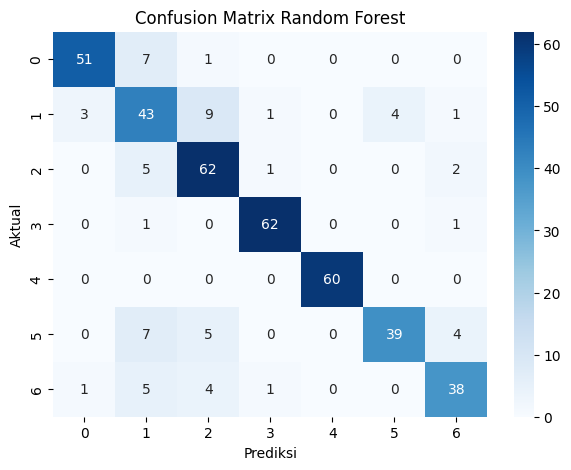

In [206]:
# Visualisasi Confusion Matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Random Forest")
plt.show()


In [209]:
# Contoh sample

uji = {
    'Gender': [1],        # Misal: 1 = Male
    'Age': [23],          # Umur muda
    'family_history_with_overweight': [1], # Punya riwayat (Yes)
    'FAVC': [1],          # Suka makan kalori tinggi (Yes)
    'FCVC': [1.0],        # Makan sayur JARANG (Skor rendah)
    'NCP': [3.0],         # Makan 3x sehari
    'CAEC': [2],          # Sering ngemil (2 = Frequently)
    'SMOKE': [0],         # Tidak merokok
    'CH2O': [1.5],        # Minum air biasa aja
    'SCC': [0],           # Tidak monitor kalori
    'FAF': [0.0],         # OLAHRAGA NOL (Malas gerak)
    'TUE': [5.0],         # MAIN GADGET 5 JAM (Tinggi)
    'CALC': [1],          # Alkohol kadang-kadang
    'MTRANS': [3]         # Transportasi Umum
}

uji = pd.DataFrame(uji)
sample = uji.reindex(columns=X_train.columns)

pred_proba = rf_model.predict_proba(sample)
pred_label = rf_model.predict(sample)

print("=== DATA SAMPEL ===")
print(sample.iloc[0]) # Print baris pertama biar rapi

print("\n=== HASIL PREDIKSI ===")
print(f"Kelas Prediksi: {pred_label[0]}")
print("\nProbabilitas per Kelas:")
# Membuat dataframe hasil probabilitas agar mudah dibaca
df_proba = pd.DataFrame(pred_proba, columns=rf_model.classes_)
print(df_proba.T) # Transpose biar ke bawah bacanya




=== DATA SAMPEL ===
Gender                             1.0
Age                               23.0
family_history_with_overweight     1.0
FAVC                               1.0
FCVC                               1.0
NCP                                3.0
CAEC                               2.0
SMOKE                              0.0
CH2O                               1.5
SCC                                0.0
FAF                                0.0
TUE                                5.0
CALC                               1.0
MTRANS                             3.0
Name: 0, dtype: float64

=== HASIL PREDIKSI ===
Kelas Prediksi: 3

Probabilitas per Kelas:
          0
0  0.060000
1  0.080000
2  0.086667
3  0.313333
4  0.026667
5  0.253333
6  0.180000


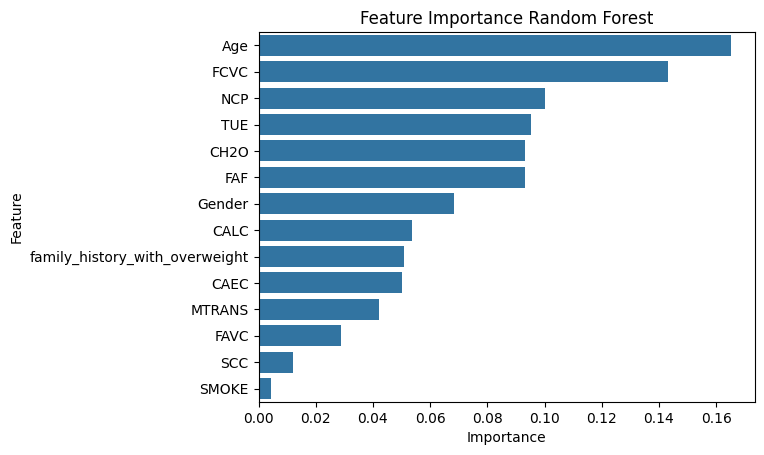

In [210]:
# Feature Importance

importance = rf_model.feature_importances_

fi_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

sns.barplot(data=fi_df, x='importance', y='feature')
plt.title("Feature Importance Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
